In [68]:
all_zero_rows = (agg_bow_df == 0).all(axis=1) 
# Count rows that have all zeros 
count_all_zero_rows = all_zero_rows.sum() 
print(f"Number of rows with all zeros: {count_all_zero_rows} from {agg_bow_df.shape[0]}")

# List the indices of rows that have all elements equal to zero 
zero_row_indices = all_zero_rows[all_zero_rows].index.tolist() 
print(f"Indices of rows with all zeros: {zero_row_indices}")

# Assuming 'agg_bow_df' is your aggregated Bag-of-Words DataFrame

# Ensure DataFrame contains only numeric columns for the operation
numeric_agg_bow_df = agg_bow_df.select_dtypes(include=['number'])
# Find rows where the sum of the row is greater than 1
rows_with_sum_greater_than_1 = numeric_agg_bow_df.apply(lambda row: row.sum() > 1, axis=1)
# Filter the DataFrame to get these rows
agg_bow_df_filtered = agg_bow_df[rows_with_sum_greater_than_1]
# Print the indices and the filtered DataFrame
print(f"Number of rows with all zeros: {count_all_zero_rows} from {agg_bow_df.shape[0]}")
print(f"Number of rows with sum greater than 1: {len(agg_bow_df_filtered)} from {agg_bow_df.shape[0]}")

NameError: name 'agg_bow_df' is not defined

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_columns = [lemmatizer.lemmatize(col) for col in columns1] # Create a mapping of original columns to lemmatized columns 
column_mapping = {original: lemmatized for original, lemmatized in zip(columns1, lemmatized_columns)}
# Create new DataFrame with lemmatized columns
lemmatized_bow_df = bow_df.rename(columns=column_mapping)
# Aggregate the counts of lemmatized columns
agg_bow_df = lemmatized_bow_df.groupby(level=0, axis=1).sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9664\2542254533.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  agg_bow_df = lemmatized_bow_df.groupby(level=0, axis=1).sum()


In [ ]:
# List of words to exclude

# exclude_words = {}

# Sample data (assuming `cat` and `title` are lists of your categories and titles)
cat = df['categories/keyword'].to_list()
title = df['title'].to_list()

data = {
    'categories': cat,
    'title': title
}

# Creating a DataFrame
df2 = pd.DataFrame(data)


# Define a function to drop rows where the title has only one word
def is_one_word(title): 
    return len(title.split()) == 1

# List of additional words to check
important_words = {
    "energy", "engineering", "environmental"," health", "material", "medical", "physical", "polymer", "science", "scientific", "technology"
}

# Modified function to include the logic
def extract_significant_words_with_logic(text_column, exclude_words, important_words, num_words=3):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(text_column)
    terms = tfidf_vectorizer.get_feature_names_out()
    most_significant_words = []
    
    for i, sentence in enumerate(X_tfidf.toarray()):
        # Check for important words in the sentence
        sentence_text = text_column.iloc[i]  # Extract the text of the current row
        important_found = [word for word in important_words if word in sentence_text]
        
        if important_found:
            # Add the first matching important word to significant words
            most_significant_words.append(important_found[0])
        else:
            # If no important word found, use TF-IDF logic
            sorted_indices = np.argsort(sentence)[::-1]  # Get indices sorted by TF-IDF scores
            significant_words = []
            for idx in sorted_indices:
                word = terms[idx]
                if word not in exclude_words:
                    significant_words.append(word)
                if len(significant_words) == num_words:
                    break
            most_significant_words.append(' '.join(significant_words))
    
    return most_significant_words

# Apply the updated function
df['most_significant_words_categories'] = extract_significant_words_with_logic(
    df2['categories'], exclude_words, important_words, num_words=1
)

# Drop rows where the title is one word
df = df[~df['title'].apply(is_one_word)]

# Save the DataFrame to a CSV file
df.to_csv("TestPCA.csv", index=False)

# Print the DataFrame
df.head()



,title,categories/keyword,author_tags,new_categories,most_significant_words_categories
0,osteogenic differentiation rat bone marrowderi...,asian biomedicine,collagen fibroins hydrogel mesenchymal stem ce...,asian biomedicine,biomedicine
1,kinetic adsorption hazardous methylene blue aq...,environment natural resource journal,adsorption dye removal ironimpregnated powdere...,environment natural resource journal,resource
2,influence phosphoric acid modification catalyt...,bulletin chemical reaction engineering catalysis,diethyl ether ethanol dehydration heterogeneou...,bulletin chemical reaction engineering catalysis,engineering
3,conundrum dominant party thailand,asian journal comparative politics,dominant party social cleavage thai party syst...,asian journal comparative politics,politics
4,effectiveness modified iodine consumption beha...,journal medical association thailand,civil society iodine deficiency pregnant woman...,medical,medical


In [123]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk_data_path = "D:/nltk_data"  # Change this to your desired directory
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Append the path to NLTK's data search paths
nltk.data.path.append(nltk_data_path)
# Download the required NLTK data to the custom path
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)
nltk.data.path.append("D:/nltk_data")

[nltk_data] Downloading package punkt to D:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to D:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to D:/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to D:/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [124]:
df = pd.read_csv('data_cleaned_ml.csv')
df.head()

,title,categories/keyword,author_tags
0,osteogenic differentiation of rat bone marrow-...,asian biomedicine,"['collagen', 'fibroins', 'hydrogels', 'mesench..."
1,kinetic adsorption of hazardous methylene blue...,environment and natural resources journal,"['adsorption', 'dye removal', 'iron-impregnate..."
2,influence of phosphoric acid modification on c...,bulletin of chemical reaction engineering and ...,"['diethyl ether', 'ethanol dehydration', 'hete..."
3,the conundrum of a dominant party in thailand,asian journal of comparative politics,"['dominant party', 'social cleavages', 'thai p..."
4,effectiveness of modified iodine consumption b...,journal of the medical association of thailand,"['civil society', 'iodine deficiency in pregna..."


In [125]:
# Define preprocessing functions
def clean_text(text):
    """Remove HTML tags, special characters, and punctuation."""
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # mapped_tokens = [synonym_mapping.get(token, token) for token in lemmatized_tokens]
    return lemmatized_tokens

def tokenize_text(text):
    tokens = word_tokenize(text, language='english', preserve_line=True)
    return tokens

def handle_missing_data(text, placeholder='Missing'):
    """Handle missing or noisy data."""
    if pd.isnull(text) or text.strip() == "":
        return placeholder
    return text

def to_lowercase(tokens):
    """Convert tokens to lowercase."""
    return [token.lower() for token in tokens]

def remove_stopwords(tokens):
    """Remove stopwords."""
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def preprocess_text(text):
    """Complete text preprocessing pipeline."""
    text = handle_missing_data(text)  # Handle missing or noisy data
    # print(f"Handled Missing Data: {text}")
    text = clean_text(text)          # Clean text (remove unwanted characters)
    # print(f"Cleaned Text: {text}")
    tokens = tokenize_text(text)     # Tokenize text
    # print(f"Tokenized Text: {tokens}")
    tokens = to_lowercase(tokens)    # Convert to lowercase
    # print(f"Lowercase Tokens: {tokens}")
    tokens = remove_stopwords(tokens)  # Remove stopwords
    # print(f"Tokens after Removing Stopwords: {tokens}")
    tokens = lemmatize_tokens(tokens)  # Or stem_tokens(tokens) for stemming
    # print(f"Lemmatized and Mapped Tokens: {tokens}")
    return ' '.join(tokens)




In [126]:
# Apply preprocessing to specific columns
df['title'] = df['title'].apply(preprocess_text)
df['categories/keyword'] = df['categories/keyword'].apply(preprocess_text)
df['author_tags'] = df['author_tags'].apply(preprocess_text)

# Save the cleaned DataFrame
df.to_csv('cleaned_processed.csv', index=False)
save_df = df
# Print the cleaned DataFrame

In [173]:
df=save_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14052\464335485.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


['medicine', 'material', 'energy', 'physic', 'technology', 'environmental', 'health', 'medical', 'chemistry', 'clinical']


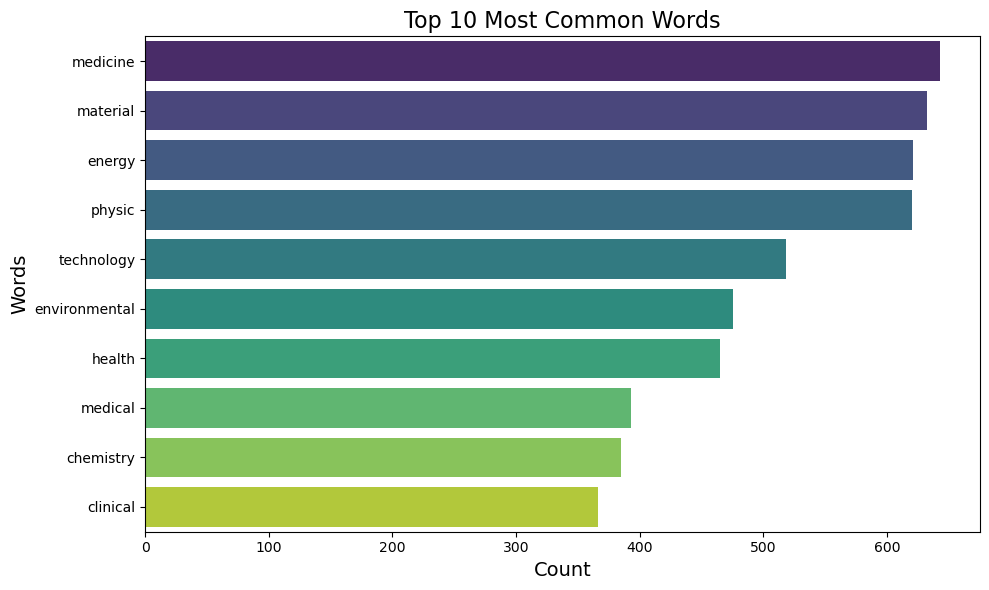

In [174]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Words to exclude
exclude_words = {"linking","impact","factor","evaluation","development","associated", "approach","activity","new", "expert",
                "expression", "application", "case","letter", "research", "paper", "journal", "today", "study", "review","using", 
                 "property","production","update", "based", "change", "applied", "access", "report", "high", "plo", "zootaxa", "novel", "scopus", "outcome", "tev", "performance"
                 ,"effect", "response","journal", "effectiveness", "modified", "systematic", "use", "trial", "state", "acute", "analysis", "association", "characteristic", 
                 "comparison", "composite", "control", "controlled", "different", "process", "acm", "thailand","proceeding", "iop","frontier", "treatment", "model", "conference", "international"
                  ,"series", "science","engineering", "asian", "one", "scientific", "b", "among" }

# Tokenize, clean, and count
def preprocess_text(text, exclude_words):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return [word for word in words if word not in exclude_words]

# Process the categories column
all_words = []
for sentence in df['categories/keyword']:
    all_words.extend(preprocess_text(sentence, exclude_words))

# Count the words
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Top 10 words

# Extract words and counts for plotting
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 10 Most Common Words", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.tight_layout()

print(list(words))

Y_data = list(words)
# Show the plot
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14052\230453081.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


['patient', 'cell', 'thai', 'system', 'disease', 'cancer', 'human', 'collision', 'acid', 'detection']


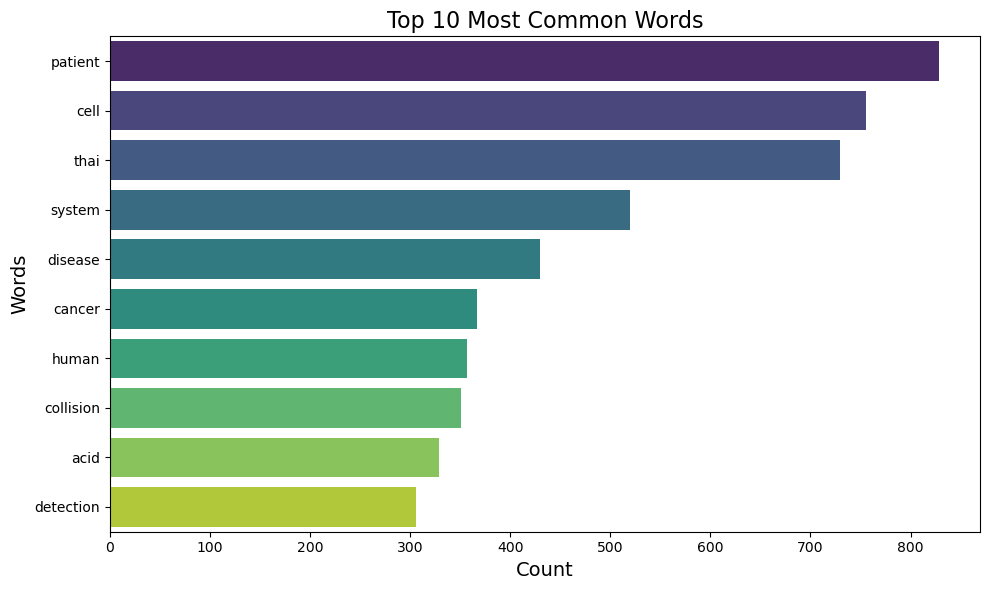

In [175]:
all_words = []
for sentence in df['title']:
    all_words.extend(preprocess_text(sentence, exclude_words))

# Count the words
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Top 10 words

# Extract words and counts for plotting
words, counts = zip(*most_common_words)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 10 Most Common Words", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.tight_layout()

print(list(words))

X_data = list(words)
# Show the plot
plt.show()

In [176]:
def substitute_row(row, top_words):
    words = preprocess_text(row, exclude_words)
    for word in words:
        if word in top_words:
            return word  # Replace the row with the matched top word
    return row  # Keep original if no top word matches

df['new_categories'] = df['categories/keyword'].apply(lambda x: substitute_row(x, Y_data))

In [177]:
df

,title,categories/keyword,author_tags,new_categories
0,osteogenic differentiation rat bone marrowderi...,asian biomedicine,collagen fibroins hydrogel mesenchymal stem ce...,asian biomedicine
1,kinetic adsorption hazardous methylene blue aq...,environment natural resource journal,adsorption dye removal ironimpregnated powdere...,environment natural resource journal
2,influence phosphoric acid modification catalyt...,bulletin chemical reaction engineering catalysis,diethyl ether ethanol dehydration heterogeneou...,bulletin chemical reaction engineering catalysis
3,conundrum dominant party thailand,asian journal comparative politics,dominant party social cleavage thai party syst...,asian journal comparative politics
4,effectiveness modified iodine consumption beha...,journal medical association thailand,civil society iodine deficiency pregnant woman...,medical
...,...,...,...,...
16583,pectincontaining compared standard polymeric f...,asia pacific journal clinical nutrition,diarrhea enteral nutrition pectincontaining fo...,clinical
16584,controlled synthesis cucuo efficient photother...,ac sustainable chemistry engineering,bifunctional catalyst coreduction cucuo interf...,chemistry
16585,normal value regional difference oesophageal i...,gut,acid exposure time impedanceph monitoring post...,gut
16586,delayed softening hom thong banana fruit posth...,songklanakarin journal science technology,banana cell wall composition cell wall structu...,technology


Rows to be dropped (df_Y_data):
4420
Filtered DataFrame (Only Rows with Top 10 Words):


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14052\1919657174.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


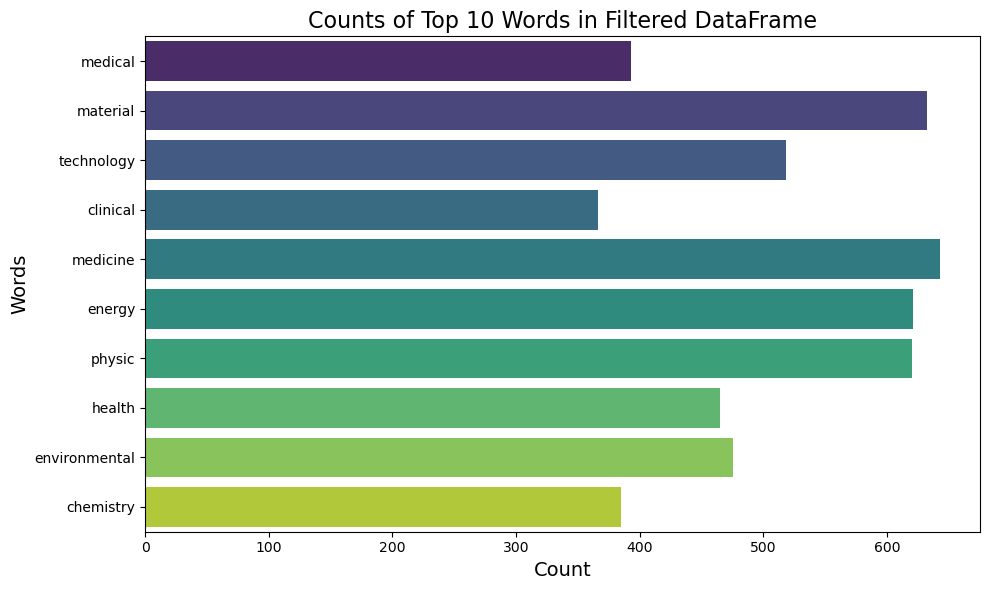

In [178]:
# Function to check if any Top 10 word is in a given row
def contains_top_word(row, top_words):
    # Tokenize the row text and check for intersection with top words
    words = set(preprocess_text(row, exclude_words))
    return bool(words.intersection(top_words))

df_Y_data = df[df['categories/keyword'].apply(lambda x: contains_top_word(x, Y_data))].reset_index(drop=True)

# Get the indices of the rows that match the condition
matching_indices = df[df['categories/keyword'].apply(lambda x: contains_top_word(x, Y_data))].index

df_X_data =  df.loc[matching_indices].reset_index(drop=True)

# Check which rows are being selected (for debugging)
print("Rows to be dropped (df_Y_data):")
print(len(matching_indices))

# Get the indices of the rows to drop from the original df
rows_to_drop = df_Y_data.index

# Drop the rows from the original df
df_dropped = df.drop(rows_to_drop).reset_index(drop=True)


# Recount occurrences of Top 10 words in the filtered DataFrame
filtered_word_counts = Counter()
for row in df['categories/keyword']:
    words = preprocess_text(row, exclude_words)
    for word in words:
        if word in Y_data:
            filtered_word_counts[word] += 1

# Extract words and counts for plotting
words, counts = zip(*filtered_word_counts.items())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Counts of Top 10 Words in Filtered DataFrame", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.tight_layout()

# Print the filtered DataFrame
print("Filtered DataFrame (Only Rows with Top 10 Words):")

# Show the plot
plt.show()

In [179]:
df_X_data

,title,categories/keyword,author_tags,new_categories
0,effectiveness modified iodine consumption beha...,journal medical association thailand,civil society iodine deficiency pregnant woman...,medical
1,training performance measurement schema mental...,iop conference series material science enginee...,assembly cognition mental rotation schema skil...,material
2,composite membrane graphene oxide cochseparation,journal chemical technology biotechnology,biogas upgrading cochseparation composite gas ...,technology
3,incidence mortality renal cell carcinoma kidne...,journal clinical medicine,kidney transplantation malignancy metaanalysis...,clinical
4,effectiveness drug survival antitumor necrosis...,journal clinical rheumatology,antitnf agent psa spondyloarthritis survival e...,clinical
...,...,...,...,...
4415,fundamental exploration carbon nanotube format...,engineering science technology international j...,cnt copyrolysis kinetics mathematical model th...,technology
4416,assessment analysis multibiomass fuel sustaina...,renewable energy,biomass power plant cocapture fluidized bed co...,energy
4417,pectincontaining compared standard polymeric f...,asia pacific journal clinical nutrition,diarrhea enteral nutrition pectincontaining fo...,clinical
4418,controlled synthesis cucuo efficient photother...,ac sustainable chemistry engineering,bifunctional catalyst coreduction cucuo interf...,chemistry


In [180]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instantiate the CountVectorizer
for category in Y_data:
    df_Y_data[category] = df_Y_data['new_categories'].apply(lambda x: 1 if category in x.split() else 0)

# Display the updated DataFrame
df_Y_data.drop(columns=["new_categories", "author_tags","categories/keyword"], inplace=True)

custom_stop_words = list(set(TfidfVectorizer(stop_words='english').get_stop_words()).union(exclude_words))

tfidf_vectorizer = TfidfVectorizer( stop_words=custom_stop_words, max_df=0.9)
X_tfidf = tfidf_vectorizer.fit_transform(df_X_data['title'])
columns2 = tfidf_vectorizer.get_feature_names_out()

X_df = pd.DataFrame(X_tfidf .toarray(), columns=columns2)
X_df


,ab,abad,abamectin,abatement,abcb,abcc,abcg,abdominal,ability,abinitio,...,zrdoped,zro,zroaddition,zrsba,zrsioon,zrtialv,zsm,zw,zwitterionic,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
df_Y_data

,title,medicine,material,energy,physic,technology,environmental,health,medical,chemistry,clinical
0,effectiveness modified iodine consumption beha...,0,0,0,0,0,0,0,1,0,0
1,training performance measurement schema mental...,0,1,0,0,0,0,0,0,0,0
2,composite membrane graphene oxide cochseparation,0,0,0,0,1,0,0,0,0,0
3,incidence mortality renal cell carcinoma kidne...,0,0,0,0,0,0,0,0,0,1
4,effectiveness drug survival antitumor necrosis...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4415,fundamental exploration carbon nanotube format...,0,0,0,0,1,0,0,0,0,0
4416,assessment analysis multibiomass fuel sustaina...,0,0,1,0,0,0,0,0,0,0
4417,pectincontaining compared standard polymeric f...,0,0,0,0,0,0,0,0,0,1
4418,controlled synthesis cucuo efficient photother...,0,0,0,0,0,0,0,0,1,0


In [182]:
all_zero_rows = (X_df == 0).all(axis=1) 
# Count rows that have all zeros 
count_all_zero_rows = all_zero_rows.sum() 
print(f"Number of rows with all zeros: {count_all_zero_rows} from {X_df.shape[0]}")

# List the indices of rows that have all elements equal to zero 
zero_row_indices = all_zero_rows[all_zero_rows].index.tolist() 
print(f"Indices of rows with all zeros: {zero_row_indices}")

# Assuming 'agg_bow_df' is your aggregated Bag-of-Words DataFrame

# Ensure DataFrame contains only numeric columns for the operation

Number of rows with all zeros: 2 from 4420
Indices of rows with all zeros: [1939, 4298]


In [183]:
X_input = X_df.drop(zero_row_indices).reset_index(drop=True) 
Y_output = df_Y_data.drop(zero_row_indices).reset_index(drop=True)
# new_df = pd.concat([df2_filtered,bow_df_filtered], axis=1)

In [184]:
X_input

,ab,abad,abamectin,abatement,abcb,abcc,abcg,abdominal,ability,abinitio,...,zrdoped,zro,zroaddition,zrsba,zrsioon,zrtialv,zsm,zw,zwitterionic,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
Y_output = Y_output.drop(columns="title")

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Assuming X_input and Y_output are already defined
X = X_input 
y = Y_output

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Multi-Label Model using MultiOutputClassifier
mnb = MultinomialNB()
multi_target_mnb = MultiOutputClassifier(mnb, n_jobs=-1)
multi_target_mnb.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = multi_target_mnb.predict(X_test)

# print(X_test)

# Step 6: Evaluate the model
print(classification_report(y_test, y_pred, target_names=Y_data))  # Ensure Y_data matches labels in y_test


               precision    recall  f1-score   support

     medicine       1.00      0.05      0.09       121
     material       1.00      0.07      0.14       120
       energy       0.75      0.34      0.47       115
       physic       0.00      0.00      0.00        56
   technology       1.00      0.02      0.04        89
environmental       1.00      0.04      0.08        92
       health       1.00      0.01      0.03        79
      medical       0.88      0.09      0.17        76
    chemistry       0.00      0.00      0.00        58
     clinical       0.00      0.00      0.00        78

    micro avg       0.83      0.08      0.14       884
    macro avg       0.66      0.06      0.10       884
 weighted avg       0.74      0.08      0.12       884
  samples avg       0.08      0.08      0.08       884



d:\anaconda3\envs\dsde-cedt\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\dsde-cedt\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [187]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming the model is already trained and y_pred has been obtained from multi_target_mnb.predict(X_test)

def get_top_2_predictions(X_input, model, Y_data):
    """
    Predicts categories for each input and returns the top 2 categories based on highest prediction probabilities.
    
    Parameters:
    X_input (array-like): The input features for which predictions are to be made.
    model (MultiOutputClassifier): The trained MultiOutputClassifier model.
    Y_data (list): List of category labels.
    
    Returns:
    list: A list of tuples where each tuple contains the 2 top predicted categories and their probabilities.
    """
    # Get prediction probabilities for each category
    y_prob = model.predict_proba(X_input)
    
    top_2_predictions = []
    
    for probs in y_prob:
        # For each row (i.e., for each sample), get the probabilities and categories
        top_2_idx = np.argsort(probs[0])[-2:][::-1]  # Get the indices of the 2 highest probabilities (sorted descending)
        top_2_categories = [Y_data[idx] for idx in top_2_idx]
        top_2_scores = [probs[0][idx] for idx in top_2_idx]
        
        top_2_predictions.append(list(zip(top_2_categories, top_2_scores)))
    
    return top_2_predictions


# Example usage
top_2_predictions = get_top_2_predictions(X_test, multi_target_mnb, Y_data)

# Print the top 2 predicted categories for the first 5 rows
for i, prediction in enumerate(top_2_predictions[:5]):
    print(f"Sample {i+1}: {prediction}")


Sample 1: [('medicine', 0.9080384369650335), ('material', 0.09196156303496818)]
Sample 2: [('medicine', 0.7911008807442929), ('material', 0.20889911925570734)]
Sample 3: [('medicine', 0.7013591678672614), ('material', 0.29864083213273906)]
Sample 4: [('medicine', 0.949741032015299), ('material', 0.05025896798469991)]
Sample 5: [('medicine', 0.8945273090957234), ('material', 0.10547269090427842)]


In [188]:
# categories_list = Y_data
# def check_correct_words(y_test, y_pred):
#     correct_counts = []
#     for i in range(len(y_test)):
#         actual_categories = [categories_list[j] for j in range(len(categories_list)) if y_test.iloc[i, j] == 1]
#         predicted_categories = [categories_list[j] for j in range(len(categories_list)) if y_pred[i, j] == 1]
#         correct_words = set(actual_categories).intersection(set(predicted_categories))
#         correct_counts.append(len(correct_words))
#     return correct_counts

# # Check correct words in predicted output compared to actual data
# correct_counts = check_correct_words(y_test, y_pred)
# print(f"Correct word counts per row: {correct_counts}")

# # Calculate accuracy
# accuracy = (sum(correct_counts) / (len(y_test) * len(categories_list))) * 100
# print(f"Accuracy: {accuracy:.2f}%")